# Machine Learning Algorithms Comparison

In [1]:
import pandas as pd
import numpy as np

In [2]:
# preprocessing libraries
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [3]:
# ML and plot libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('data/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Data Preprocessing

In [6]:
# standarize numerical columns
num_cols = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

StandardScaler = StandardScaler()
df[num_cols] = StandardScaler.fit_transform(df[num_cols])

In [7]:
# encode categorial columns
enc = OneHotEncoder()

cat_cols = df[['AgeCategory', 'Race', 'GenHealth']]
encoded_cat_cols = pd.DataFrame(enc.fit_transform(cat_cols).toarray())
df = pd.concat([df, encoded_cat_cols], axis=1)
df = df.drop(columns=['AgeCategory', 'Race', 'GenHealth'], axis=1)

In [8]:
# Encode labels in Yes/No columns
label_encoder = LabelEncoder()
yn_cols = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
           'DiffWalking', 'Sex', 'Diabetic', 'PhysicalActivity',
           'Asthma', 'KidneyDisease', 'SkinCancer']
for i in yn_cols:
    df[i] = label_encoder.fit_transform(df[i])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,14,15,16,17,18,19,20,21,22,23
0,0,-1.844750,1,0,0,-0.046751,3.281069,0,0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,-1.256338,0,0,1,-0.424070,-0.490039,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,-0.274603,1,0,0,2.091388,3.281069,0,1,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,-0.647473,0,0,0,-0.424070,-0.490039,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,-0.726138,0,0,0,3.097572,-0.490039,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [9]:
# split data into training and testing set
# 30% testing, 70% training
features = df.drop(columns=['HeartDisease'], axis=1)
label = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(features, label,
                                                    shuffle=True, test_size=.3)

In [10]:
# check shapes of training and testing sets
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (223856, 38)
Shape of testing feature: (95939, 38)
Shape of training label: (223856,)
Shape of training label: (95939,)


## Models

In [11]:
def evaluate_model(model, x_test, y_test):
    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

### Decision Tree 

In [12]:
clf = DecisionTreeClassifier()

# Train
clf.fit(X_train, y_train)

# Store all of the revelant evaluation metrics
clf_result = evaluate_model(clf, X_test, y_test)

# Some of the evaluation metrics
print('Accuracy:', clf_result['acc'])
print('Precision:', clf_result['prec'])
print('Recall:', clf_result['rec'])
print('F1 Score:', clf_result['f1'])
print('Cohens Kappa Score:', clf_result['kappa'])
print('Area Under Curve:', clf_result['auc'])
print('Confusion Matrix:\n', clf_result['cm'])

Accuracy: 0.8635382899550756
Precision: 0.22821670428893906
Recall: 0.2443209279845336
F1 Score: 0.23599439775910364
Cohens Kappa Score: 0.16116805482895813
Area Under Curve: 0.5836715612344866
Confusion Matrix:
 [[80825  6838]
 [ 6254  2022]]


### Naive Bayes Classifier

In [13]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_result = evaluate_model(gnb, X_test, y_test)

print("Accuracy:", gnb_result['acc'])
print('Precision:', gnb_result['prec'])
print('Recall:', gnb_result['rec'])
print('F1 Score:', gnb_result['f1'])
print('Cohens Kappa Score:', gnb_result['kappa'])
print('Area Under Curve:', gnb_result['auc'])
print('Confusion Matrix:\n', gnb_result['cm'])

Accuracy: 0.7153295323069867
Precision: 0.20353238015138772
Recall: 0.7895118414693089
F1 Score: 0.32363357190618885
Cohens Kappa Score: 0.2161109208165578
Area Under Curve: 0.8181408662419801
Confusion Matrix:
 [[62094 25569]
 [ 1742  6534]]


### Logistic Regression

In [14]:
logreg = LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)
logreg_result = evaluate_model(logreg, X_test, y_test)

print("Accuracy:", logreg_result['acc'])
print('Precision:', logreg_result['prec'])
print('Recall:', logreg_result['rec'])
print('F1 Score:', logreg_result['f1'])
print('Cohens Kappa Score:', logreg_result['kappa'])
print('Area Under Curve:', logreg_result['auc'])
print('Confusion Matrix:\n', logreg_result['cm'])

Accuracy: 0.9150189182709847
Precision: 0.5377532228360957
Recall: 0.10584823586273562
F1 Score: 0.17688036345280161
Cohens Kappa Score: 0.1528430587722509
Area Under Curve: 0.8403342369651934
Confusion Matrix:
 [[86910   753]
 [ 7400   876]]


### Gradient Boosting Classifier

In [15]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_result = evaluate_model(gbc, X_test, y_test)

print("Accuracy:", gbc_result['acc'])
print('Precision:', gbc_result['prec'])
print('Recall:', gbc_result['rec'])
print('F1 Score:', gbc_result['f1'])
print('Cohens Kappa Score:', gbc_result['kappa'])
print('Area Under Curve:', gbc_result['auc'])
print('Confusion Matrix:\n', gbc_result['cm'])

Accuracy: 0.9151961141975631
Precision: 0.5486111111111112
Recall: 0.09545674238762687
F1 Score: 0.16261836146562372
Cohens Kappa Score: 0.1406446684976541
Area Under Curve: 0.8414197836207044
Confusion Matrix:
 [[87013   650]
 [ 7486   790]]


## Comparison 

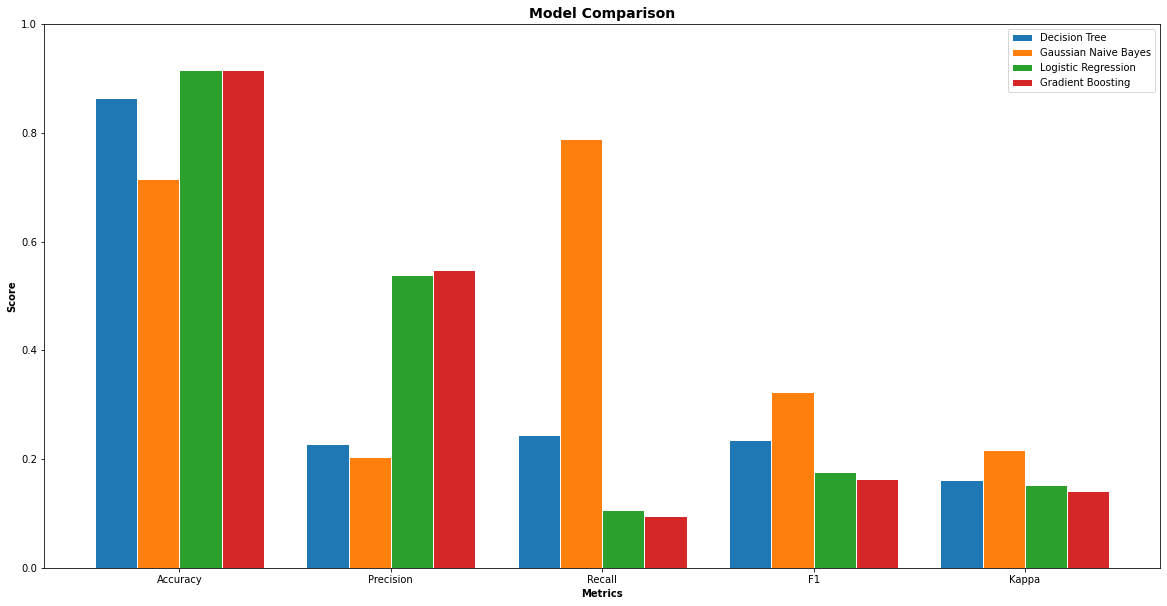

In [16]:
# Intitialize figure with two plots
fig = plt.figure(figsize=(20, 10))
plt.title('Model Comparison', fontsize=14, fontweight='bold')

# first plot
barWidth = 0.2
clf_score = [clf_result['acc'], clf_result['prec'], clf_result['rec'],
             clf_result['f1'], clf_result['kappa']]
gnb_score = [gnb_result['acc'], gnb_result['prec'], gnb_result['rec'],
             gnb_result['f1'], gnb_result['kappa']]
logreg_score = [logreg_result['acc'], logreg_result['prec'],
                logreg_result['rec'], logreg_result['f1'], logreg_result['kappa']]
gbc_score = [gbc_result['acc'], gbc_result['prec'], gbc_result['rec'],
             gbc_result['f1'], gbc_result['kappa']]

# Set position of bar on X axis
br1 = np.arange(len(clf_score))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot

plt.bar(br1, clf_score, width=barWidth, edgecolor='white', 
        label='Decision Tree')
plt.bar(br2, gnb_score, width=barWidth, edgecolor='white',
        label='Gaussian Naive Bayes')
plt.bar(br3, logreg_score, width=barWidth, edgecolor='white',
        label='Logistic Regression')
plt.bar(br4, gbc_score, width=barWidth, edgecolor='white',
        label='Gradient Boosting')

# Configure x and y axis
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + (barWidth*1.5) for r in range(len(clf_score))],
           ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa'])
plt.ylabel('Score', fontweight='bold')
plt.ylim(0, 1)
plt.legend()
plt.savefig('figures/model_comparison.png')


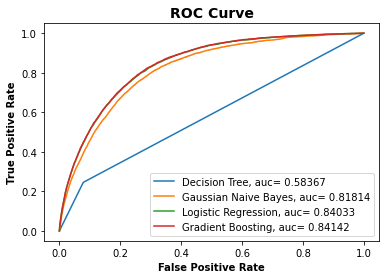

In [17]:
# Comparing ROC Curve
plt.plot(clf_result['fpr'], clf_result['tpr'],
         label='Decision Tree, auc={: 0.5f}'.format(clf_result['auc']))
plt.plot(gnb_result['fpr'], gnb_result['tpr'],
         label='Gaussian Naive Bayes, auc={: 0.5f}'.format(gnb_result['auc']))
plt.plot(logreg_result['fpr'], logreg_result['tpr'],
         label='Logistic Regression, auc={: 0.5f}'.format(logreg_result['auc']))
plt.plot(gbc_result['fpr'], gbc_result['tpr'],
         label='Gradient Boosting, auc={: 0.5f}'.format(gbc_result['auc']))

# Configure x and y axis
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')

# Create legend & title
plt.title('ROC Curve', fontsize=14, fontweight='bold')
plt.legend()
plt.savefig('figures/roc_curve.png')
plt.show()